In [1]:
# Importing the dataset from keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# Checking the ‘type’
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

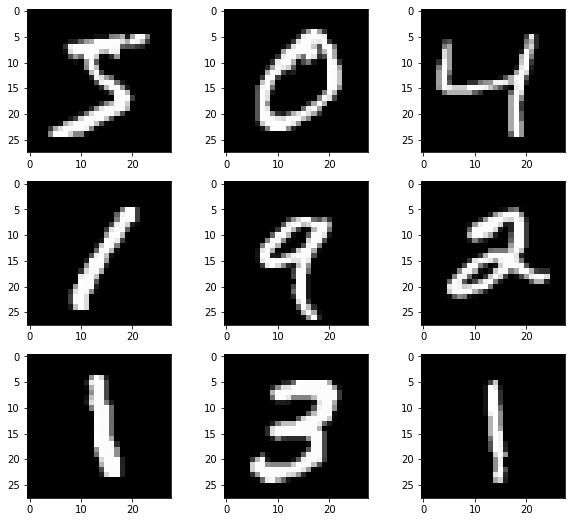

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [5]:
# Printing examples in 'y_train'
for i in range(5):
  print(y_train[i])

5
0
4
1
9


In [6]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0
255


In [7]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())
x_train.shape

0.0
1.0


(60000, 28, 28)

In [9]:
nsamples, nx, ny =x_train.shape
train_dataset = x_train.reshape((nsamples,nx*ny))


In [10]:
import numpy as np 
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(train_dataset)

C:\Users\ivc21262adm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [11]:
kmeans.labels_


array([4, 6, 8, ..., 4, 9, 0])

In [83]:
def retrieve_info(cluster_labels,y_train):

#  Associates most probable label with each cluster in KMeans model
#  returns: dictionary of clusters assigned to each label

  # Initializing
  reference_labels = {}
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [13]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [14]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype('int'))
print(y_train[:20])

[8 0 4 1 4 0 1 8 1 4 8 1 3 6 1 4 2 8 6 4]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [15]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.6111


Task 1: Run the above code by solving all issues

Task 2: Optimize the code to improve the accuracy using given tutorial

Task 3: Try to run the code by using differnet dataset(Other than digits)

# Task 1: Run the above code by solving all issues
#Completed as above

# Task 2: Optimize the code to improve the accuracy using given tutorial
below is perfoamce improvement 

In [18]:
# Function to calculate metrics for the model
def calculate_metrics(model,output):
 print('Number of clusters is {}'.format(model.n_clusters))
 print('Inertia : {}'.format(model.inertia_))
 print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [32]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
    total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = i)
# Fitting the model to training set
    kmeans.fit(train_dataset)
# Calculating the metrics
    calculate_metrics(kmeans,y_train)
# Calculating reference_labels
    reference_labels = retrieve_info(kmeans.labels_,y_train)
# ‘number_labels’ is a list which denotes the number displayed in image
    number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print('\n')
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
print('\n')

Number of clusters is 10
Inertia : 2385003.75
Homogeneity :       0.4979627429681377
Number of clusters is 16
Inertia : 2211280.75
Homogeneity :       0.5620133336425874
Number of clusters is 36
Inertia : 1965955.875
Homogeneity :       0.6808301681857164
Number of clusters is 64
Inertia : 1806373.25
Homogeneity :       0.7481543445789419
Number of clusters is 144
Inertia : 1621672.625
Homogeneity :       0.8106073865113683
Number of clusters is 256
Inertia : 1502906.0
Homogeneity :       0.8417360102248539


Accuracy score : 0.8963166666666667




# Task 3: Try to run the code by using differnet dataset(Other than digits)

In [100]:
import numpy as np
from keras.datasets import cifar10
 

(new_train, newy_train ), (new_test, newy_test) =cifar10.load_data()
# Checking the ‘type’
print(type(new_train))
print(type(new_test))
print(type(newy_train))
print(type(newy_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [101]:
print((new_train.shape))
print((new_test.shape))
print((newy_train.shape))
print((newy_test.shape))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


<Figure size 432x288 with 0 Axes>

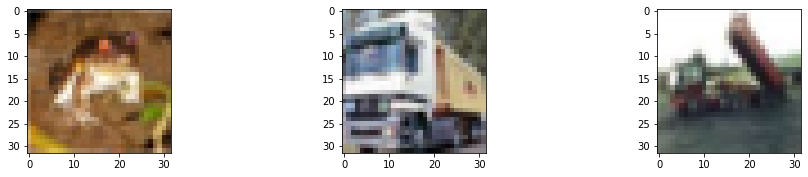

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.gray() # B/W Images
plt.figure(figsize = (16,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(3):
 plt.subplot(3,3,i+1)
 plt.imshow(new_train[i])

In [92]:
# Checking the minimum and maximum values of x_train
print(new_train.min())
print(new_train.max())

0
255


In [103]:
# Conversion to float
new_train = new_train.astype('float32') 
new_test = new_test.astype('float32')
# Normalization
new_train = new_train/255.0
new_test = new_test/255.0

In [75]:
# Checking the minimum and maximum values of x_train
print(new_train.min())
print(new_train.max())
new_train.shape

0.0
0.003921569


(50000, 32, 32, 3)

In [104]:
nosamples, nox, noy,z =new_train.shape
new_train = new_train.reshape((nosamples,nox*noy*z))

In [105]:
import numpy as np 
from sklearn.cluster import MiniBatchKMeans
# Data Normalization

#(new_train, new_test), (newy_train, newy_test)

total_clusters = len(np.unique(newy_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(new_train)

MiniBatchKMeans(n_clusters=10)

In [106]:
kmeans.labels_

array([1, 9, 7, ..., 7, 2, 3])

In [108]:
newy_train = newy_train.reshape((nosamples))
reference_lab = retrieve_info(kmeans.labels_,newy_train)
number_lab = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_lab[i] = reference_lab[kmeans.labels_[i]]

In [109]:
# Comparing Predicted values and Actual values
print(number_lab[:20].astype('int'))
print(y_train[:20])

[6 5 8 6 1 1 2 2 0 1 6 8 8 4 1 8 8 6 9 2]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [110]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_lab,newy_train))

0.22574


In [112]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
    total_clusters = len(np.unique(newy_test))
# Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = i)
# Fitting the model to training set
    kmeans.fit(new_train)
# Calculating the metrics
    calculate_metrics(kmeans,newy_train)
# Calculating reference_labelsnewy_train
    reference_labels = retrieve_info(kmeans.labels_,newy_train)
# ‘number_labels’ is a list which denotes the number displayed in image
    number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print('\n')
print('Accuracy score : {}'.format(accuracy_score(number_labels,newy_train)))
print('\n')

Number of clusters is 10
Inertia : 6133826.5
Homogeneity :       0.07245870316159307
Number of clusters is 16
Inertia : 5854103.5
Homogeneity :       0.09223202656753268
Number of clusters is 36
Inertia : 5455150.0
Homogeneity :       0.11882396006559584
Number of clusters is 64
Inertia : 5187395.5
Homogeneity :       0.138961869966077
Number of clusters is 144
Inertia : 4877724.0
Homogeneity :       0.16824913852940895
Number of clusters is 256
Inertia : 4700027.0
Homogeneity :       0.19016102279623043


Accuracy score : 0.3217




In [ ]:
# Accuracy imporved by 10% gtpm .22 t0.3217

# What do you analyze in different phases of code? Explain both types of classification.

#  #  Which differences did you identify in unsupervised and supervised image classification?

In [ ]:

Supervised classification of image is converting the Image into pixel that are from of specific classes. 
it needs user input on the number of classes that image  needs to be classified into.
The user also sets the bounds for how similar other pixels must be to group them together. 
In the Unsupervised we have usecd conv2d model.

Unsupervised classification the classification is done with out user providing sample classes . 
The image is converted into pixel  and determine which pixels are related and groups them into classes.
The user does not aid in the classification process\



in the above example , bounds are often set based on the spectral characteristics inertia 
and homogeneity  and we can improve Accuracy
